# Data Modelling

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
def evaluate_regression_model(y_true, y_pred):
    """
    Evaluate a regression model using various metrics.

    Args:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values by the regression model.

    Returns:
    None
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print('Mean Absolute Error (MAE): ', mae)
    print('Mean Squared Error (MSE): ', mse)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print('R-squared (R²): ', r2)

In [3]:
# import data
df = pd.read_csv('../processed/data_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862805 entries, 0 to 1862804
Data columns (total 38 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   title                                          object 
 1   imgUrl                                         object 
 2   productURL                                     object 
 3   reviews                                        int64  
 4   is_rated                                       int64  
 5   log_price                                      float64
 6   stars                                          float64
 7   categoryName_Automotive & Industrial           int64  
 8   categoryName_Babies & Children                 int64  
 9   categoryName_Beauty & Personal Care            int64  
 10  categoryName_Birthday Gifts                    int64  
 11  categoryName_Candles & Holders                 int64  
 12  categoryName_Customers' Most Loved        

In [4]:
df.describe()

,reviews,is_rated,log_price,stars,categoryName_Automotive & Industrial,categoryName_Babies & Children,categoryName_Beauty & Personal Care,categoryName_Birthday Gifts,categoryName_Candles & Holders,categoryName_Customers' Most Loved,...,categoryName_Packaging & Shipping Supplies,"categoryName_Pens, Pencils & Writing Supplies",categoryName_Pet Supplies,categoryName_Photo Frames,"categoryName_Pools, Hot Tubs & Supplies",categoryName_Professional Medical Supplies,categoryName_Safety & Security,categoryName_School & Educational Supplies,categoryName_Signs & Plaques,categoryName_Sports & Outdoor Equipment
count,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,...,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06
mean,4.559697e+02,5.627546e-01,2.925664e+00,2.424426e+00,2.725191e-02,1.078642e-02,5.729263e-02,3.580085e-03,1.336694e-04,3.662219e-03,...,9.072340e-05,4.883496e-03,5.062258e-03,1.363535e-04,4.449204e-03,8.374468e-05,3.463594e-03,4.084700e-03,2.804910e-03,3.804934e-01
std,5.481258e+03,4.960464e-01,9.117767e-01,2.178868e+00,1.628166e-01,1.032961e-01,2.324010e-01,5.972663e-02,1.156078e-02,6.040537e-02,...,9.524454e-03,6.971119e-02,7.096925e-02,1.167626e-02,6.655382e-02,9.150831e-03,5.875031e-02,6.378101e-02,5.288709e-02,4.855083e-01
min,0.000000e+00,0.000000e+00,9.950331e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.313525e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,2.832625e+00,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.900000e+01,1.000000e+00,3.400864e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.356658e+06,1.000000e+00,9.050876e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df_cor = df[['reviews', 'is_rated', 'log_price', 'stars']]

## Correlation Plot

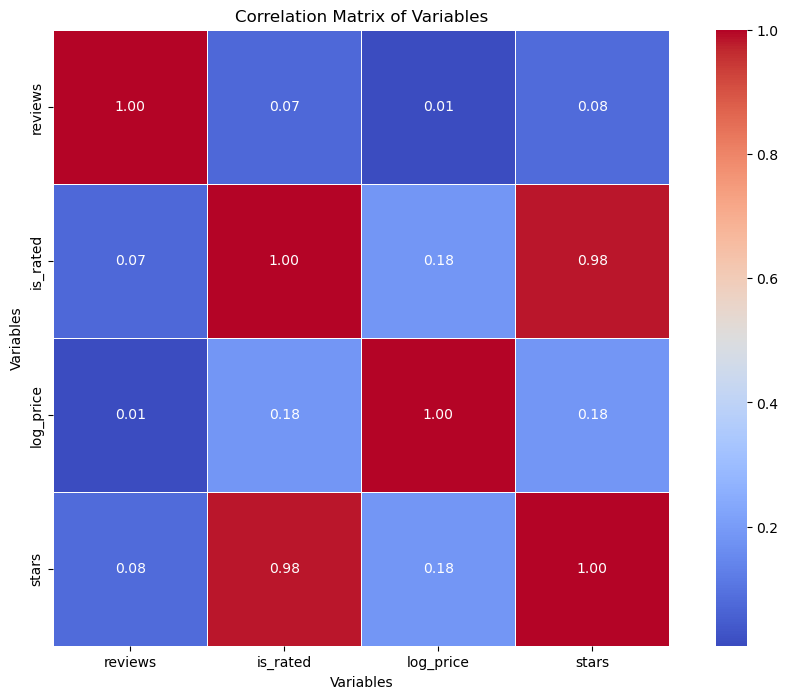

In [6]:
corr_matrix = df_cor.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add titles and labels
plt.title('Correlation Matrix of Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [7]:
df1 = df.copy()

In [8]:
df1.describe()

,reviews,is_rated,log_price,stars,categoryName_Automotive & Industrial,categoryName_Babies & Children,categoryName_Beauty & Personal Care,categoryName_Birthday Gifts,categoryName_Candles & Holders,categoryName_Customers' Most Loved,...,categoryName_Packaging & Shipping Supplies,"categoryName_Pens, Pencils & Writing Supplies",categoryName_Pet Supplies,categoryName_Photo Frames,"categoryName_Pools, Hot Tubs & Supplies",categoryName_Professional Medical Supplies,categoryName_Safety & Security,categoryName_School & Educational Supplies,categoryName_Signs & Plaques,categoryName_Sports & Outdoor Equipment
count,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,...,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06,1.862805e+06
mean,4.559697e+02,5.627546e-01,2.925664e+00,2.424426e+00,2.725191e-02,1.078642e-02,5.729263e-02,3.580085e-03,1.336694e-04,3.662219e-03,...,9.072340e-05,4.883496e-03,5.062258e-03,1.363535e-04,4.449204e-03,8.374468e-05,3.463594e-03,4.084700e-03,2.804910e-03,3.804934e-01
std,5.481258e+03,4.960464e-01,9.117767e-01,2.178868e+00,1.628166e-01,1.032961e-01,2.324010e-01,5.972663e-02,1.156078e-02,6.040537e-02,...,9.524454e-03,6.971119e-02,7.096925e-02,1.167626e-02,6.655382e-02,9.150831e-03,5.875031e-02,6.378101e-02,5.288709e-02,4.855083e-01
min,0.000000e+00,0.000000e+00,9.950331e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.313525e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,2.832625e+00,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.900000e+01,1.000000e+00,3.400864e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.356658e+06,1.000000e+00,9.050876e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862805 entries, 0 to 1862804
Data columns (total 38 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   title                                          object 
 1   imgUrl                                         object 
 2   productURL                                     object 
 3   reviews                                        int64  
 4   is_rated                                       int64  
 5   log_price                                      float64
 6   stars                                          float64
 7   categoryName_Automotive & Industrial           int64  
 8   categoryName_Babies & Children                 int64  
 9   categoryName_Beauty & Personal Care            int64  
 10  categoryName_Birthday Gifts                    int64  
 11  categoryName_Candles & Holders                 int64  
 12  categoryName_Customers' Most Loved        

## Modelling

In [10]:
## Splitting Independent and dependent variables
X = df1.drop(['title', 'imgUrl', 'productURL', 'stars'], axis=1)
y = df1['stars']

## KNN Model

In [11]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the KNN model
k = 5  # Optimal value of k
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
# Predictions
y_pred = knn.predict(X_test)

In [13]:
# Evaluate the model
evaluate_regression_model(y_test, y_pred)

Mean Absolute Error (MAE):  0.2213560899145018
Mean Squared Error (MSE):  0.20350071182910376
Root Mean Squared Error (RMSE):  0.4511105317204463
R-squared (R²):  0.9571164816968647


## Decision Trees

In [14]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Train the model
dt = DecisionTreeRegressor()

dt_regressor = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

dt_regressor.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", dt_regressor.best_params_)
print("Best Score:", dt_regressor.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Best Score: 0.9636915649152885


In [15]:
# Predictions
y_pred = dt_regressor.predict(X_test)

In [16]:
# Evaluate the model
evaluate_regression_model(y_test, y_pred)

Mean Absolute Error (MAE):  0.20646092548471548
Mean Squared Error (MSE):  0.1736319133938723
Root Mean Squared Error (RMSE):  0.4166916286582589
R-squared (R²):  0.9634107061881557


## Random Forest

In [17]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Train the model
rf = RandomForestRegressor()

rf_regressor = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_regressor.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", rf_regressor.best_params_)
print("Best Score:", rf_regressor.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.963760658651753


In [22]:
# Predictions
y_pred = rf_regressor.predict(X_test)

In [23]:
# Evaluate the model
evaluate_regression_model(y_test, y_pred)

Mean Absolute Error (MAE):  0.2047047583098751
Mean Squared Error (MSE):  0.17283915393398575
Root Mean Squared Error (RMSE):  0.41573928601226245
R-squared (R²):  0.9635777636618248


## Save Models

In [21]:
def save_model(model, name):
    """
    Saves model as pickle file

    Args:
    model (array-like): Machine learning model.
    name (str): Name of the model.

    Returns:
    None
    """
    path = '../../backend/models/' + name
    with open(path, 'wb') as file:
        pickle.dump(model, file)

In [24]:
# save decision tree
save_model(dt_regressor, 'decision_tree_model.pkl')

In [25]:
# save random forest
save_model(rf_regressor, 'random_forest.pkl')